C:\Anaconda\lib\site-packages\ipykernel_launcher.py:76: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:79: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


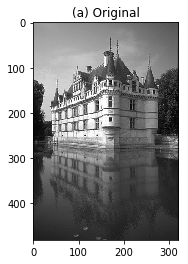

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:84: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


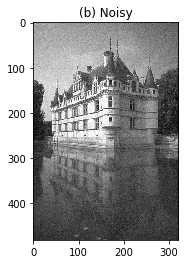

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:89: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


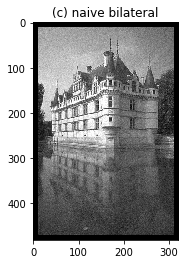

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:94: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


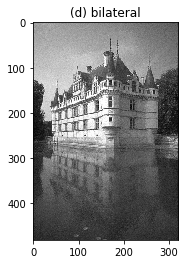

In [4]:
import numpy as np
from scipy.misc import imread, imsave
import matplotlib.pyplot as plt
import math

#question (1)
def test_imbilateral(img, sigma0):
    (n1,n2)=img.shape
    img_test=img+sigma0*np.random.randn(n1,n2)
    for i in range (0,n1):
        for j in range (0,n2):
            if img_test[i,j]>255:
                img_test[i,j]=255
            if img_test[i,j]<0:
                img_test[i,j]=0
    return img_test




#question(2),(3)
def imbilateral_naive(img, sigma, s1, s2, h):
    (n1,n2)=img.shape
    naive=np.zeros((n1,n2), dtype=np.uint8)
    dominator=16*h*sigma**2
    for i in range (s1,n1-s1):
        for j in range (s2,n2-s2):
            sum=0
            Z=0
            for k in range (-s1,s1+1):
                for l in range (-s2,s2+1):
                    phi=math.exp(max(2*sigma**2-(img[i+k,j+l]-img[i,j])**2,0)/dominator)
                    sum=sum+phi*img[i,j]
                    Z=Z+phi
            naive[i,j]=sum/Z
    return naive

#question(4),(5),(6)
def imshift(x, p, q):
    n1=x.shape[1]#columns
    n2=x.shape[0]#rows
    k=p%n2
    l=q%n1
    xshifted=np.zeros([n2,n1])
    xshifted[n2-k:n2,0:l]=x[0:k,n1-l:n1]
    xshifted[0:n2-k,l:n1]=x[k:n2,0:n1-l]
    xshifted[0:n2-k,0:l]=x[k:n2,n1-l:n1]
    xshifted[n2-k:n2,l:n1]=x[0:k,0:n1-l]
    return xshifted

def imbilateral(img, sigma, s1, s2, h):
    (n1,n2)=img.shape
    naive=np.zeros((n1,n2), dtype=np.uint8)
    dominator=16*h*sigma**2
    sum=np.zeros((n1,n2))
    bilateral=np.zeros((n1,n2))
    numerator=np.zeros((n1,n2))
    z=np.zeros((n1,n2))
    phi=np.zeros((n1,n2))
    for k in range (-s1,s1+1):
        for l in range (-s2,s2+1):
            numerator=2*sigma**2-np.power(imshift(img,k,l)-img,2)
            numerator[numerator>0]=0
            phi=np.exp(numerator/dominator)
            z=z+phi
            sum=sum+phi*imshift(img,k,l)
    numerator=sum/z
    return numerator

sigma0=10
h=1
s1=10
s2=10
8
sigma=3
pic=imread('castle.png')
plt.imshow(pic,cmap='gray')
plt.title('(a) Original')
imsave('Original.png',pic)
plt.show()
pic_noise=test_imbilateral(pic, sigma0)
plt.imshow(pic_noise,cmap='gray')
plt.title('(b) Noisy')
imsave('Noisy.png',pic_noise)
plt.show()
pic_naive=imbilateral_naive(pic_noise, sigma, s1, s2, h)
plt.imshow(pic_naive,cmap='gray')
plt.title('(c) naive bilateral')
imsave('naive bilateral.png',pic_naive)
plt.show()
pic_bilateral=imbilateral(pic_noise, sigma, s1,s2, h)
plt.imshow(pic_bilateral,cmap='gray')
plt.title('(d) bilateral')
imsave('bilateral.png',pic_bilateral)
plt.show()